In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('day.csv') #importando o DataFrame.

In [64]:
data.head(60) #analisando o Dataframe

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [65]:
data.isnull().sum() #Verificando se temos dados nulos.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [66]:
matriz_correlacao = data.corr()

ValueError: could not convert string to float: '2011-01-01'

In [67]:
data_numericos = data.select_dtypes(include='number')

In [68]:
data_numericos

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [69]:
matriz_correlacao = data_numericos.corr()

In [70]:
matriz_correlacao

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


<Axes: >

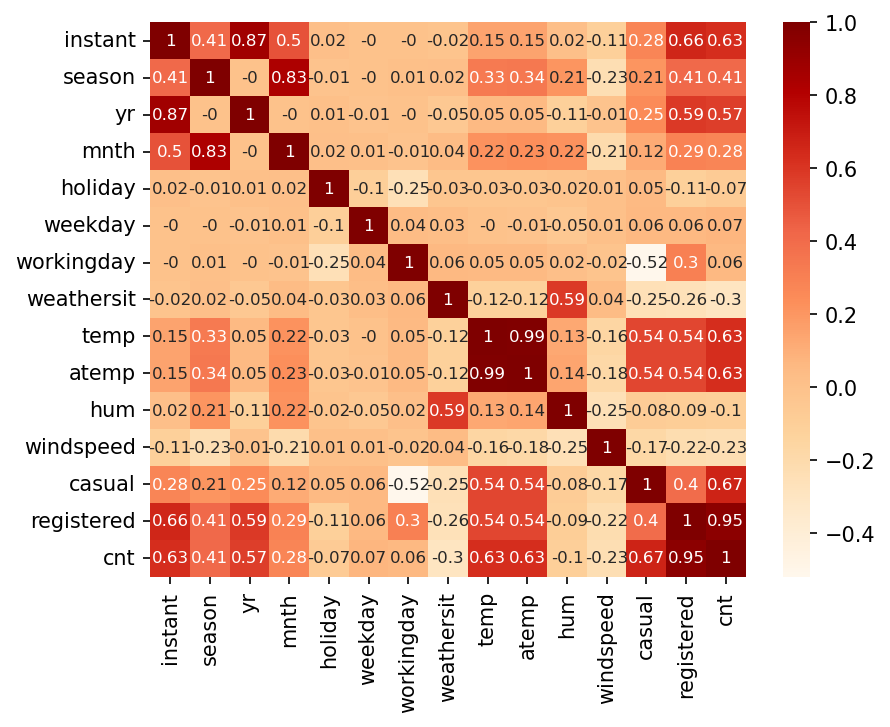

In [71]:
f, ax = plt.subplots(dpi=150)
sns.heatmap(matriz_correlacao.round(2), annot=True,annot_kws={'size': 8}, cmap='OrRd')

In [72]:
data.drop('holiday', axis=1, inplace=True)
data.drop('weekday', axis=1, inplace=True)
data.drop('workingday', axis=1, inplace=True)

In [73]:
data

,instant,dteday,season,yr,mnth,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [74]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [75]:
data.columns = ['instant', 'Data', 'Estação', 'Ano', 'Mês', 'Prev. Tempo', 'Temperatura',
       'Sens. Térm.', 'Umidade', 'windspeed', 'casual', 'registered', 'cnt']

In [76]:
data

,instant,Data,Estação,Ano,Mês,Prev. Tempo,Temperatura,Sens. Térm.,Umidade,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [77]:
data.set_index('instant',inplace=True)

In [78]:
data.drop('Data', axis=1, inplace=True)
data.drop('casual', axis=1, inplace=True)
data.drop('registered', axis=1, inplace=True)

In [79]:
data

,Estação,Ano,Mês,Prev. Tempo,Temperatura,Sens. Térm.,Umidade,windspeed,cnt
instant,,,,,,,,,
1,1,0,1,2,0.344167,0.363625,0.805833,0.160446,985
2,1,0,1,2,0.363478,0.353739,0.696087,0.248539,801
3,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...
727,1,1,12,2,0.254167,0.226642,0.652917,0.350133,2114
728,1,1,12,2,0.253333,0.255046,0.590000,0.155471,3095
729,1,1,12,2,0.253333,0.242400,0.752917,0.124383,1341


In [80]:
data.shape

(731, 9)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estação      731 non-null    int64  
 1   Ano          731 non-null    int64  
 2   Mês          731 non-null    int64  
 3   Prev. Tempo  731 non-null    int64  
 4   Temperatura  731 non-null    float64
 5   Sens. Térm.  731 non-null    float64
 6   Umidade      731 non-null    float64
 7   windspeed    731 non-null    float64
 8   cnt          731 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 57.1 KB


In [82]:
train_data = data

In [83]:
train_data

,Estação,Ano,Mês,Prev. Tempo,Temperatura,Sens. Térm.,Umidade,windspeed,cnt
instant,,,,,,,,,
1,1,0,1,2,0.344167,0.363625,0.805833,0.160446,985
2,1,0,1,2,0.363478,0.353739,0.696087,0.248539,801
3,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...
727,1,1,12,2,0.254167,0.226642,0.652917,0.350133,2114
728,1,1,12,2,0.253333,0.255046,0.590000,0.155471,3095
729,1,1,12,2,0.253333,0.242400,0.752917,0.124383,1341


In [84]:
test_data = data.drop('cnt', axis=1)

In [85]:
test_data

,Estação,Ano,Mês,Prev. Tempo,Temperatura,Sens. Térm.,Umidade,windspeed
instant,,,,,,,,
1,1,0,1,2,0.344167,0.363625,0.805833,0.160446
2,1,0,1,2,0.363478,0.353739,0.696087,0.248539
3,1,0,1,1,0.196364,0.189405,0.437273,0.248309
4,1,0,1,1,0.200000,0.212122,0.590435,0.160296
5,1,0,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...
727,1,1,12,2,0.254167,0.226642,0.652917,0.350133
728,1,1,12,2,0.253333,0.255046,0.590000,0.155471
729,1,1,12,2,0.253333,0.242400,0.752917,0.124383


In [86]:
x = train_data.drop('cnt',axis=1)

In [87]:
y = train_data['cnt']

In [88]:
x

,Estação,Ano,Mês,Prev. Tempo,Temperatura,Sens. Térm.,Umidade,windspeed
instant,,,,,,,,
1,1,0,1,2,0.344167,0.363625,0.805833,0.160446
2,1,0,1,2,0.363478,0.353739,0.696087,0.248539
3,1,0,1,1,0.196364,0.189405,0.437273,0.248309
4,1,0,1,1,0.200000,0.212122,0.590435,0.160296
5,1,0,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...
727,1,1,12,2,0.254167,0.226642,0.652917,0.350133
728,1,1,12,2,0.253333,0.255046,0.590000,0.155471
729,1,1,12,2,0.253333,0.242400,0.752917,0.124383


In [89]:
y

instant
1       985
2       801
3      1349
4      1562
5      1600
       ... 
727    2114
728    3095
729    1341
730    1796
731    2729
Name: cnt, Length: 731, dtype: int64

In [91]:
lm = linear_model.LinearRegression()

In [207]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [208]:
lm.fit(X_train, y_train)

LinearRegression()

In [209]:
pred = lm.predict(X_test)
pred.shape

(147,)

In [210]:
lm.score(X_test, y_test).round(3)

0.826

In [211]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

802.6858363126192

In [212]:
pred

array([4022.75868343, 2461.41023168, 4789.03947264, 4479.8823653 ,
       6394.37905684, 4928.23430615, 5595.17848864, 3936.41901995,
       2110.58598295, 5393.15725837, 2802.76953601, 1414.63483868,
        958.70982285, 2321.73818374, 6577.24028304, 2929.43785653,
       5273.7679716 , 5423.14578049, 3200.86952175, 5173.15861082,
       1918.99502196, 7225.88398246, 4898.9408044 , 3441.44684611,
       4729.68299523, 4326.90715629, 7403.17255887, 4779.87571142,
       4275.09475229, 2892.55317639, 1646.2006551 , 3394.45670434,
       1896.17606714, 3220.756382  , 7955.45090647, 4654.30845074,
       1333.37367942, 3287.39738325, 7531.53930957, 4365.87745345,
       3064.93212778, 6371.53763312, 8208.39987719, 5124.86628264,
       5150.22590287, 5223.31128552, 6699.03335482, 3988.52101093,
       4946.40285186, 5011.8979289 , 2677.05124387, 7190.87132585,
       3156.298974  , 2211.45887142, 4002.79946093, 3354.41541127,
       2124.6627387 , 6987.23459665, 5652.89846484, 1455.67705

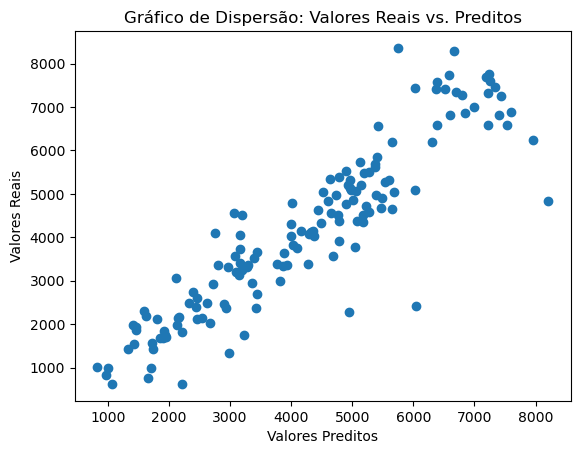

In [213]:
plt.scatter(pred, y_test)
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Preditos')
plt.show()